# Assignment 8 - Pandas

### Due Thursday, June 10, 2021

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository `CMSC6950_Assignments` with the filename `Assignment_8.ipynb`. 

In this assignment we will use pandas to examine earthquake data.

Start by importing pandas, numpy and matplotlib.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A dataset has be retrieved .csv format from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). It is located at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't even need to download it. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this url to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [20]:
data = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')
df = pd.DataFrame(data)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used as the index

Verify that this worked using the `head` and `info` functions.


In [7]:
data = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', parse_dates=[0], index_col=11)
df = pd.DataFrame(data)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [9]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


In [10]:
df.mag.describe()

count    120065.000000
mean          1.793958
std           1.343466
min          -0.970000
25%           0.820000
50%           1.400000
75%           2.400000
max           8.200000
Name: mag, dtype: float64

### 4) Use `sort_values` to get the top 20 earthquakes by magnitude

In [11]:
df.sort_values('mag', ascending=False).head(20)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


Examine the structure of the `place` column. The country information seems to be in there. How would you get it out?

### 5) Extract the country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe. (Is it really just country? No, some rows have the name of a US state.)

In [26]:
df['country']=df['place'].str.split(',').str.get(1)

In [28]:
df['country'].head(10)

0         Alaska
1         Nevada
2         Alaska
3         Alaska
4         Mexico
5         Mexico
6     California
7         Alaska
8         Alaska
9     California
Name: country, dtype: object

### 6) Find the 10 states / countries with the highest _number_ of earthquakes

In [29]:
df.groupby(['country'])['mag'].count().nlargest(10)

country
 California     44446
 Alaska         33588
 Oregon          3194
 Nevada          2828
 Washington      2784
 Hawaii          2564
 Puerto Rico     2284
 Indonesia       2120
 Montana         1991
 Oklahoma        1991
Name: mag, dtype: int64

### 7) Find the top 10 states / countries where the strongest and weakest earthquakes occured

In [30]:
print(df.groupby(['country'])['mag'].max().sort_values()[-10:])
print(df.groupby(['country'])['mag'].min().sort_values()[:10])

country
 China               6.9
 Greece              6.9
 Indonesia           7.1
 Fiji                7.1
 Mexico              7.2
 El Salvador         7.3
 Papua New Guinea    7.5
 Solomon Islands     7.6
 Alaska              7.9
 Chile               8.2
Name: mag, dtype: float64
country
 Oregon         -0.97
 Washington     -0.90
 Montana        -0.85
 Nevada         -0.60
 California     -0.45
 Wyoming        -0.14
 Canada         -0.10
 Utah           -0.10
 Alaska          0.00
 Sierra Leone    0.00
Name: mag, dtype: float64


It looks like US states are being treated differently from foreign countries. We would like to fix that.

How can we tell if a name is a US state name? Python has a package for that: https://pypi.python.org/pypi/us!

This is a good time to try installing a new package using `pip`. Pip is the original python package manager that predates `conda`. Basically `conda` is more oriented towards data science while `pip` is more general purpose. There are lots more packages on `pip` than on `conda`. You can read a [comparision](https://www.quora.com/What-is-the-comparison-among-conda-vs-pip-vs-anaconda) of these two utilities if you want to know more.

### 8) Install the `us` package using pip, either directly from the notebook or the command line

The shell command is `pip install us`.

In [1]:
!pip install us

  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11929 sha256=650e769bc13f45d70bb6c7df3af2c6b41fe58c08b12b1226e3a891edbfd81bf7
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\07\4c\fa\a65ed0f9c00360e785327fc370eba55ca575cc3508ab13ed8e
  Created wheel for jellyfish: filename=jellyfish-0.6.1-py3-none-any.whl size=10380 sha256=8142c708fd9bc211a0fb89ae4af64875b3e39f41ff2e371f31b52178dc99f238
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\aa\a9\a6\359d736dbeda356e6ab8a7ff70a3db636cefe91df7d09f63dc
Successfully built us jellyfish


### 9) Import the `us` package to verify your installation works

In [2]:
import us

### 10) Read the [`us` documentation](https://pypi.python.org/pypi/us) to figure out how to create a list of state names (all upper case)

In [3]:
help(us)

In [6]:
states = us.STATES
states

[<State:Alabama>,
 <State:Alaska>,
 <State:Arizona>,
 <State:Arkansas>,
 <State:California>,
 <State:Colorado>,
 <State:Connecticut>,
 <State:Delaware>,
 <State:Florida>,
 <State:Georgia>,
 <State:Hawaii>,
 <State:Idaho>,
 <State:Illinois>,
 <State:Indiana>,
 <State:Iowa>,
 <State:Kansas>,
 <State:Kentucky>,
 <State:Louisiana>,
 <State:Maine>,
 <State:Maryland>,
 <State:Massachusetts>,
 <State:Michigan>,
 <State:Minnesota>,
 <State:Mississippi>,
 <State:Missouri>,
 <State:Montana>,
 <State:Nebraska>,
 <State:Nevada>,
 <State:New Hampshire>,
 <State:New Jersey>,
 <State:New Mexico>,
 <State:New York>,
 <State:North Carolina>,
 <State:North Dakota>,
 <State:Ohio>,
 <State:Oklahoma>,
 <State:Oregon>,
 <State:Pennsylvania>,
 <State:Rhode Island>,
 <State:South Carolina>,
 <State:South Dakota>,
 <State:Tennessee>,
 <State:Texas>,
 <State:Utah>,
 <State:Vermont>,
 <State:Virginia>,
 <State:Washington>,
 <State:West Virginia>,
 <State:Wisconsin>,
 <State:Wyoming>]

### 11) Write a function to check whether a string is a US state name.
This function should not be case sensitive. It should also strip any whitespace out of the test string.

In [14]:
def is_state(str):
    if us.states.lookup(str):
        return True
    else:
        return False
    
is_state('tyty'), is_state('Utah')

(False, True)

### 12) Use Pandas' [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) function to apply this to each row of the country name series

You should produce a new boolean series. (Hint: use `dropna()` to drop rows that have null values before calling apply.)

In [32]:
state_series = data['country'].dropna().apply(is_state)
state_series

0          True
1          True
2          True
3          True
4         False
          ...  
120103     True
120104     True
120105     True
120106     True
120107     True
Name: country, Length: 116607, dtype: bool

### 13) reindex this boolean series to match the dataframe's index
Fill the null values with `False` using `.fillna()`.

In [35]:
state_reindexed = state_series.reindex(data.index).fillna(False)
state_reindexed

0          True
1          True
2          True
3          True
4         False
          ...  
120103     True
120104     True
120105     True
120106     True
120107     True
Name: country, Length: 120108, dtype: bool

### 14) Now re-assign the country column in the DataFrame to `USA` if the row is a state.
Also add the state name as a new column.

In [37]:
states = data['country'][state_reindexed].reindex(data.index)
data['state']=states
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country,state
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska,Alaska
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada,Nevada
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska,Alaska
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska,Alaska
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,Alaska,Alaska
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska,Alaska
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,California,California
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake,Alaska,Alaska


In [39]:
df.loc[state_reindexed,'country']='USA'
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country,state
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,USA,Alaska
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,USA,Nevada
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,USA,Alaska
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,USA,Alaska
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,USA,Alaska
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,USA,Alaska
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,USA,California
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake,USA,Alaska


### 15) Now redo the country count and minimum magnitdue using the corrected data

In [42]:
df['country'].describe()

count     116607
unique       159
top          USA
freq       99425
Name: country, dtype: object

In [41]:
df['mag'].describe()

count    120065.000000
mean          1.793958
std           1.343466
min          -0.970000
25%           0.820000
50%           1.400000
75%           2.400000
max           8.200000
Name: mag, dtype: float64

### 16) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [43]:
large = df.mag >= 4
df[large]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country,state
10,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,usc000mqlp,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea,NaN
14,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,usc000mqln,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand,NaN
16,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,usc000mqls,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,NaN,NaN
26,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,usc000mf1x,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,USA,Alaska
31,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,usc000mqlm,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120064,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,usc000t6yh,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,USA,Northern Mariana Islands
120077,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,usc000t6y2,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia,NaN
120090,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,usc000t6y1,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines,NaN
120098,2014-12-01 00:40:02.720,37.2096,71.9458,95.57,4.2,mb,NaN,125.0,1.097,0.91,us,usb000t1gp,2015-02-24T00:35:14.040Z,"11km ESE of Roshtqal'a, Tajikistan",earthquake,Tajikistan,NaN


### 17) Analyze the distribution of the Earthquake magnitudes in the filtered distribution

Make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see?

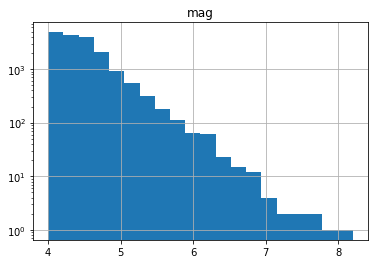

In [44]:
fig, ax = plt.subplots()
df[large].hist('mag', bins=20, ax=ax)
ax.set_yscale('log')

### 18) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude.

Use the filtered data. Color it by magnitude. Make it pretty

Text(0.5, 1.0, 'Earthquake Magnitudes')

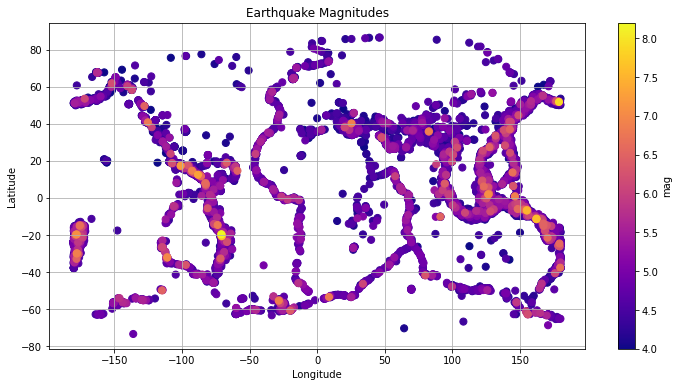

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
h = df[large].sort_values('mag').plot(ax=ax, kind='scatter', x='longitude', y='latitude', c='mag', s=50, colormap='plasma',grid=True)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Earthquake Magnitudes')

### 19) Do the same for depth

Text(0.5, 1.0, 'Earthquake Depths')

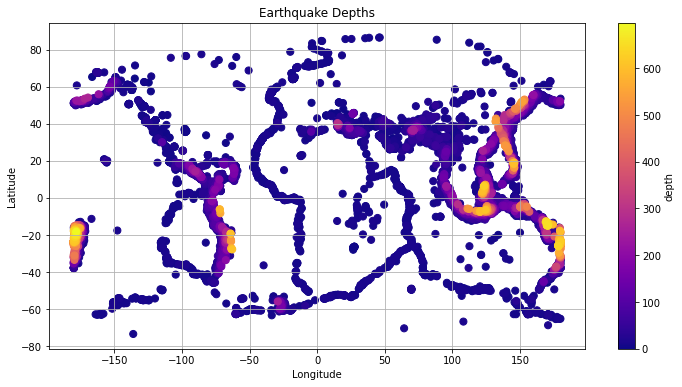

In [46]:
fig, ax = plt.subplots(figsize=(12,6))
h = df[large].sort_values('depth').plot(ax=ax, kind='scatter', x='longitude', y='latitude', c='depth', s=50, colormap='plasma',grid=True)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Earthquake Depths')